# INTRODUCTION

This notebook will be a very simple and quick comparison between two widely used dimensionality reduction techniques, that of PCA ( Principal Component Analysis ) and TSNE ( T-Distributed Stochastic Neighbouring Entities).

One of the coauthors of the T-SNE paper gave a nice talk, which is unfortunately too long to show during lab.
https://www.youtube.com/watch?v=RJVL80Gg3lA

The basic idea of T-SNE is to measure pair-wise similarity rather than maximizing variance in PCA (which we showed was equivalent to minimizing a Euclidean distance). To do this, we construct a conditional probability over pairs of points centered at $\mathbf{x}_j$.

\begin{equation}
p_{ij} = \frac{\exp(-||\mathbf{x}_i-\mathbf{x}_j||_2)/2\sigma_i^2}{\sum_k\sum_{i\neq j'} -\exp(||\mathbf{x}_i-\mathbf{x}_j'||_2)/2\sigma_i^2}
\end{equation}

Notice that $\sigma$ is indexed and thus varies for each point. The values of $\sigma_i$ are controlled by a hyperparameter called perplexity which serves as a smooth measure of the effective number of neighbors.

Suppose then that in a low $\textit{d}$-dimensional space we make a similar measurement (with $\mathbf{y}_i$ d-dimensional))

\begin{equation}
q_{ij} = \frac{(1+||\mathbf{y}_i-\mathbf{y}_j||^2)^{-1}}{\sum_k\sum_{l\neq k}(1+||\mathbf{y}_k-\mathbf{y}_l||^2)^{-1}}
\end{equation}


We can then minimize the Kullback-Liebler divergence (which is a measure of how much one probability distribution varies from another) between the distributions.

\begin{equation}
D_{KL}(P||Q) = \sum_i\sum_{j \neq i} p_{ij} \log \frac{p_{ij}}{q_{ij}}
\end{equation}

Then, we simply minimize $D_{KL}$ with respect to $\mathbf{y}_i$ via gradient descent.

Notice that the equation for $q_{ij}$ is not the same as $p_{ij}$. This is in fact a Student's t-distribution with one degree of freedom (Cauchy Distribution), which has heavier tails than a Gaussian. 

In [15]:
# Import our relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

Load the data as a dataframe

Breast Cancer Data

In [16]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


From a quick look at the data, we can see a few things.  Our target column, **diagnosis** is in a non-numeric format, therefore if we need to carry out any visualisations, we will probably need to convert the strings to numeric values. Second point, there exists Null values in the dataframe and we need to get rid of that. Furthermore, the id column is probably irrelevant in our visualisation endeavours so we can get rid of that as well.

In [17]:
# Drop the id column
data = data.drop('id', axis=1)
# Convert the diagnosis column to numeric format
data['diagnosis'] = data['diagnosis'].factorize()[0] #enumerates a categorical variable
# Fill all Null values with zero
data = data.fillna(value=0)
# Store the diagnosis column in a target object and then drop it
target = data['diagnosis']
data = data.drop('diagnosis', axis=1)

# VISUALISING PCA AND TSNE PLOTS

Let's get to the meat of this notebook which is to produce high-level PCA and TSNE visuals 

In [18]:
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.manifold import TSNE # TSNE module

In [19]:
# Turn dataframe into arrays
X = data.values

# Invoke the PCA method. Since this is a binary classification problem
# let's call n_components = 2
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X)

# Invoke the TSNE method
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 33.679708
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.299744
[t-SNE] KL divergence after 2000 iterations: 0.222474


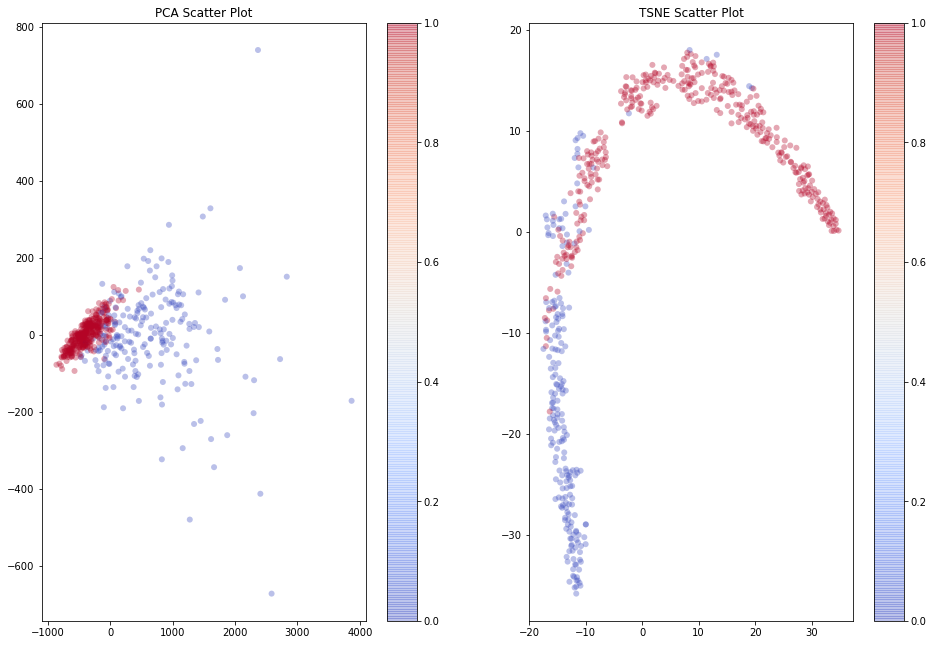

In [8]:
# Plot the TSNE and PCA visuals side-by-side
plt.figure(figsize = (16,11))
plt.subplot(121)
plt.scatter(pca_2d[:,0],pca_2d[:,1], c = target, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')
plt.subplot(122)
plt.scatter(tsne_results[:,0],tsne_results[:,1],  c = target, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show()

As one can see from these high-level plots, even though PCA does quite a decent job of visualising our two target clusters ( M for Malignant and B for Benign - cheating a bit here with the labels), the visuals in TSNE is much more obvious in terms of the demarcation in the target.

# STANDARDISATION AND VISUALISATION

Let's now try scaling (or standardising) our features and see if we can get even more obvious/intuitive clusters in our plots.

In [9]:
# Calling Sklearn scaling method

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [10]:
# Invoke the PCA method on the standardised data
pca = PCA(n_components=2)
pca_2d_std = pca.fit_transform(X_std)

# Invoke the TSNE method
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
tsne_results_std = tsne.fit_transform(X_std)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.027s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.468437
[t-SNE] KL divergence after 2000 iterations: 0.886488


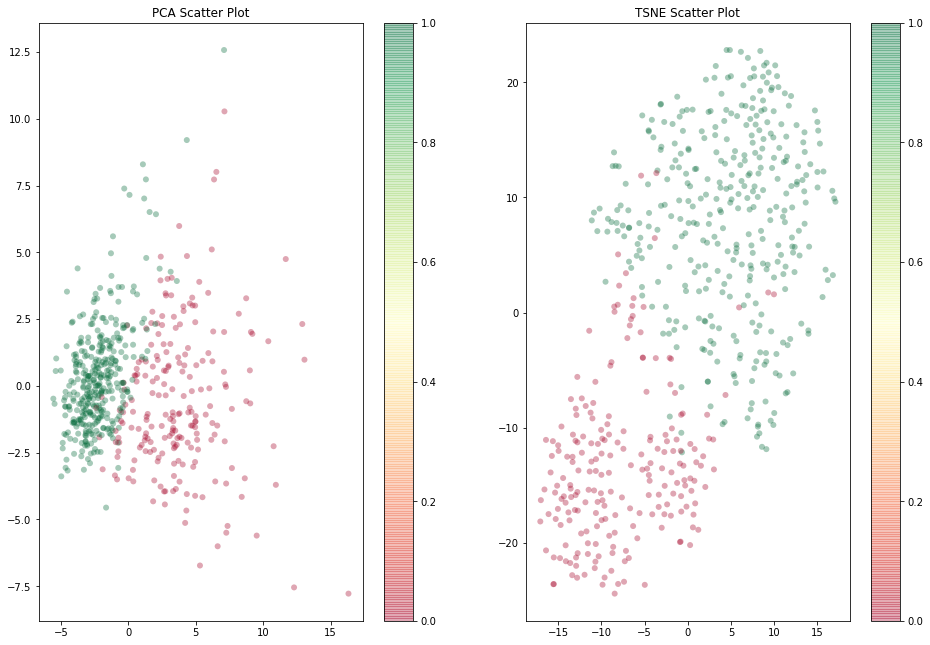

In [11]:
# Plot the TSNE and PCA visuals side-by-side
plt.figure(figsize = (16,11))
plt.subplot(121)
plt.scatter(pca_2d_std[:,0],pca_2d_std[:,1], c = target, 
            cmap = "RdYlGn", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')
plt.subplot(122)
plt.scatter(tsne_results_std[:,0],tsne_results_std[:,1],  c = target, 
            cmap = "RdYlGn", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show()